In [13]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,auc,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,precision_score,recall_score,f1_score,roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


In [2]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Data Load
file_name="Telco_churn_preprocessed_dropped_col"
df= pd.read_csv(file_name)
df.shape

(7032, 25)

In [4]:
#Drop the unnamed column
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)],
          axis=1, inplace=True)
df.shape

(7032, 24)

In [5]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [6]:
#Since during binariization, Churn col went i between, need to shift it the end
cols_predict = ['Churn']
df = df[[col for col in df if col not in cols_predict] 
        + [col for col in cols_predict if col in df]]

In [7]:
#Splitting the data in to test and train 
df_train,df_test=train_test_split(df,test_size=0.2, stratify=df['Churn'])

In [8]:
X_df=df_train.values[:,0:23]
Y_df=df_train.values[:,23]
X_dftest=df_test.values[:,0:23]
Y_dftest=df_test.values[:,23]

In [19]:
smt = SMOTE()
X_df, Y_df = smt.fit_sample(X_df, Y_df)

In [9]:
def plotROC(fp, tp):
    plt.plot(fp, tp,label='ROC Line', color='Red', )
    plt.plot([0, 1], [0, 1], color='Black', linestyle='-.')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [10]:
def rocAUC(model):
    probability = model.predict_proba(X_dftest)[:,1]
    fp, tp, th = roc_curve(Y_dftest, probability)
    plotROC(fp, tp)
    auc = roc_auc_score(Y_dftest, probability)
    print('AUC: ', auc)

Accuracy is 76.19047619047619
Confusion Matrix is
[[799 234]
 [101 273]]
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83      1033
         1.0       0.54      0.73      0.62       374

    accuracy                           0.76      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.76      0.77      1407



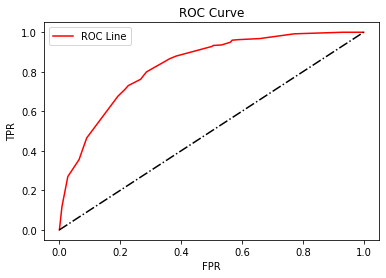

AUC:  0.8304649766269263


In [20]:
#Decision tree Classifier
dt = DecisionTreeClassifier( criterion = "entropy", max_depth =5) 
dt.fit(X_df, Y_df) 
Y_pred1 = dt.predict(X_dftest) 

#Perf measure
acc1=accuracy_score(Y_dftest,Y_pred1)*100;
print("Accuracy is",acc1)

conf_matrix1 = confusion_matrix(Y_dftest,Y_pred1)
print("Confusion Matrix is");print(conf_matrix1)

print(classification_report(Y_dftest,Y_pred1))

rocAUC(dt)

Accuracy is 75.12437810945273
Confusion Matrix is
[[766 267]
 [ 83 291]]
              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81      1033
         1.0       0.52      0.78      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



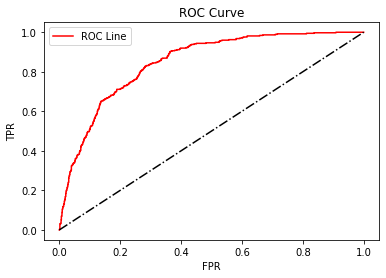

AUC:  0.8469257807849003
0.7780748663101604
0.521505376344086


In [21]:
#Logistic Regression
lr = LogisticRegression(solver='lbfgs',max_iter=100, penalty='l2')
lr.fit(X_df,Y_df)
Y_pred3 = lr.predict(X_dftest)

#Perf measure
acc3=accuracy_score(Y_dftest,Y_pred3)*100;
print("Accuracy is",acc3)

conf_matrix3 = confusion_matrix(Y_dftest,Y_pred3)
print("Confusion Matrix is");print(conf_matrix3)

print(classification_report(Y_dftest,Y_pred3))

rocAUC(lr)

print(recall_score(Y_dftest,Y_pred3))
print(precision_score(Y_dftest,Y_pred3))

Accuracy is 75.12437810945273
Confusion Matrix is
[[766 267]
 [ 83 291]]
              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81      1033
         1.0       0.52      0.78      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



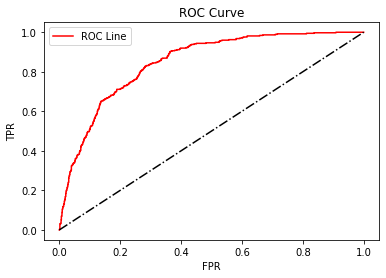

AUC:  0.8469257807849003
0.7780748663101604
0.521505376344086


In [22]:
#Logistic Regression with NearMiss
nr = NearMiss()
X_df_n, Y_df_n = nr.fit_sample(X_df, Y_df)

lr = LogisticRegression(solver='lbfgs',max_iter=100, penalty='l2')
lr.fit(X_df_n, Y_df_n)
Y_pred_n = lr.predict(X_dftest)

#Perf measure
acc_n=accuracy_score(Y_dftest,Y_pred_n)*100;
print("Accuracy is",acc_n)

conf_matrix_n = confusion_matrix(Y_dftest,Y_pred_n)
print("Confusion Matrix is");print(conf_matrix_n)

print(classification_report(Y_dftest,Y_pred_n))

rocAUC(lr)

print(recall_score(Y_dftest,Y_pred_n))
print(precision_score(Y_dftest,Y_pred_n))

Accuracy is 77.68301350390902
Confusion Matrix is
[[864 169]
 [145 229]]
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1033
         1.0       0.58      0.61      0.59       374

    accuracy                           0.78      1407
   macro avg       0.72      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



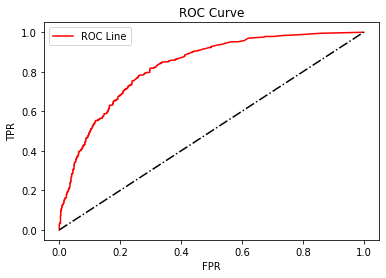

AUC:  0.8289857173178169


In [23]:
#Random forest 
rf=RandomForestClassifier(n_estimators = 100, max_depth=20,random_state =2,criterion='gini')
rf.fit(X_df, Y_df)
Y_pred2=rf.predict(X_dftest)

#Perf measure
acc2=accuracy_score(Y_dftest,Y_pred2)*100;
print("Accuracy is",acc2)

conf_matrix2 = confusion_matrix(Y_dftest,Y_pred2)
print("Confusion Matrix is");print(conf_matrix2)

print(classification_report(Y_dftest,Y_pred2))

rocAUC(rf)

No handles with labels found to put in legend.


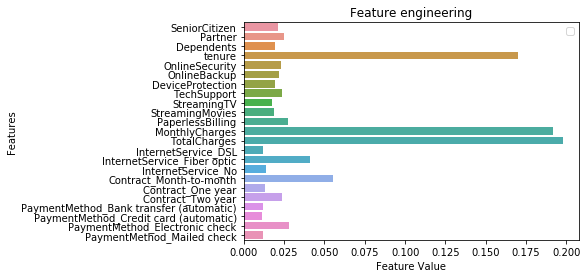

['Partner',
 'tenure',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'InternetService_Fiber optic',
 'Contract_Month-to-month',
 'PaymentMethod_Electronic check']

In [58]:
#RAndom Forest feature selection
columns_name= [i for i in df.columns if i not in cols_predict]

important_features=rf.feature_importances_
important_features_names=pd.Series(important_features,index=columns_name)
sns.barplot(important_features_names,important_features_names.index)
plt.xlabel('Feature Value')
plt.ylabel('Features')
plt.title("Feature engineering")
plt.legend()
plt.show()

affecting_features=[]
for i in important_features_names.index:
    if important_features_names[i]>0.025:
        affecting_features.append(i)
affecting_features

Accuracy is 78.1094527363184
Confusion Matrix is
[[860 173]
 [135 239]]
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85      1033
         1.0       0.58      0.64      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407



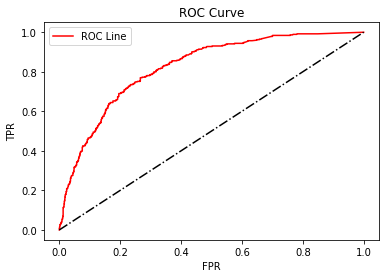

AUC:  0.8226131251585383


In [24]:
#Extreme Random Forest
erf=ExtraTreesClassifier(n_estimators = 100, max_depth=20,random_state =2,criterion='gini')
erf.fit(X_df, Y_df)
Y_pred5=erf.predict(X_dftest)

#Perf measure
acc5 = accuracy_score(Y_dftest,Y_pred5)*100
print("Accuracy is",acc5)

conf_matrix5 = confusion_matrix(Y_dftest,Y_pred5)
print("Confusion Matrix is");print(conf_matrix5)

print(classification_report(Y_dftest,Y_pred5))

rocAUC(erf)

Accuracy is 70.1492537313433
Confusion Matrix is
[[718 315]
 [105 269]]
              precision    recall  f1-score   support

         0.0       0.87      0.70      0.77      1033
         1.0       0.46      0.72      0.56       374

    accuracy                           0.70      1407
   macro avg       0.67      0.71      0.67      1407
weighted avg       0.76      0.70      0.72      1407



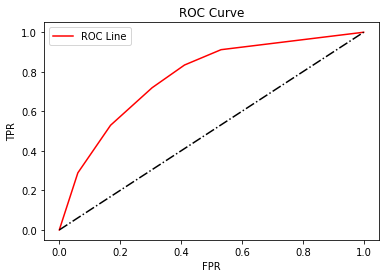

AUC:  0.7733549549362999


In [25]:
#KNN lazy learner
knn=KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='minkowski',p=2)
knn.fit(X_df, Y_df)
Y_pred6=knn.predict(X_dftest)

#Perf measure
acc6 = accuracy_score(Y_dftest,Y_pred6)*100
print("Accuracy is",acc6)

conf_matrix6 = confusion_matrix(Y_dftest,Y_pred6)
print("Confusion Matrix is");print(conf_matrix6)

print(classification_report(Y_dftest,Y_pred6))

rocAUC(knn)

Accuracy is 76.19047619047619
Confusion Matrix is
[[868 165]
 [170 204]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1033
         1.0       0.55      0.55      0.55       374

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



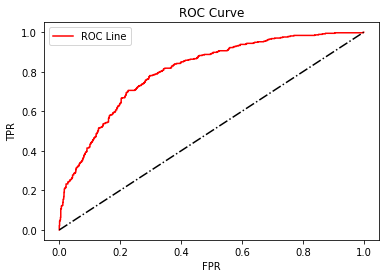

AUC:  0.8045669381014747


In [26]:
#XGBost
xgbf=xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 1, learning_rate = 0.9,
                max_depth = 10, alpha = 10, n_estimators = 100)
xgbf.fit(X_df,Y_df)
Y_pred7=xgbf.predict(X_dftest)

#Perf measure
acc7 = accuracy_score(Y_dftest,Y_pred7)*100
print("Accuracy is",acc7)

conf_matrix7 = confusion_matrix(Y_dftest,Y_pred7)
print("Confusion Matrix is");print(conf_matrix7)

print(classification_report(Y_dftest,Y_pred7))

rocAUC(xgbf)